In [12]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
# Load the data
df = sns.load_dataset("titanic")
#df.info()

In [14]:
# Find null value summary par column using pandas
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# Find total null values
df.isnull().sum().sum()

np.int64(869)

<Axes: >

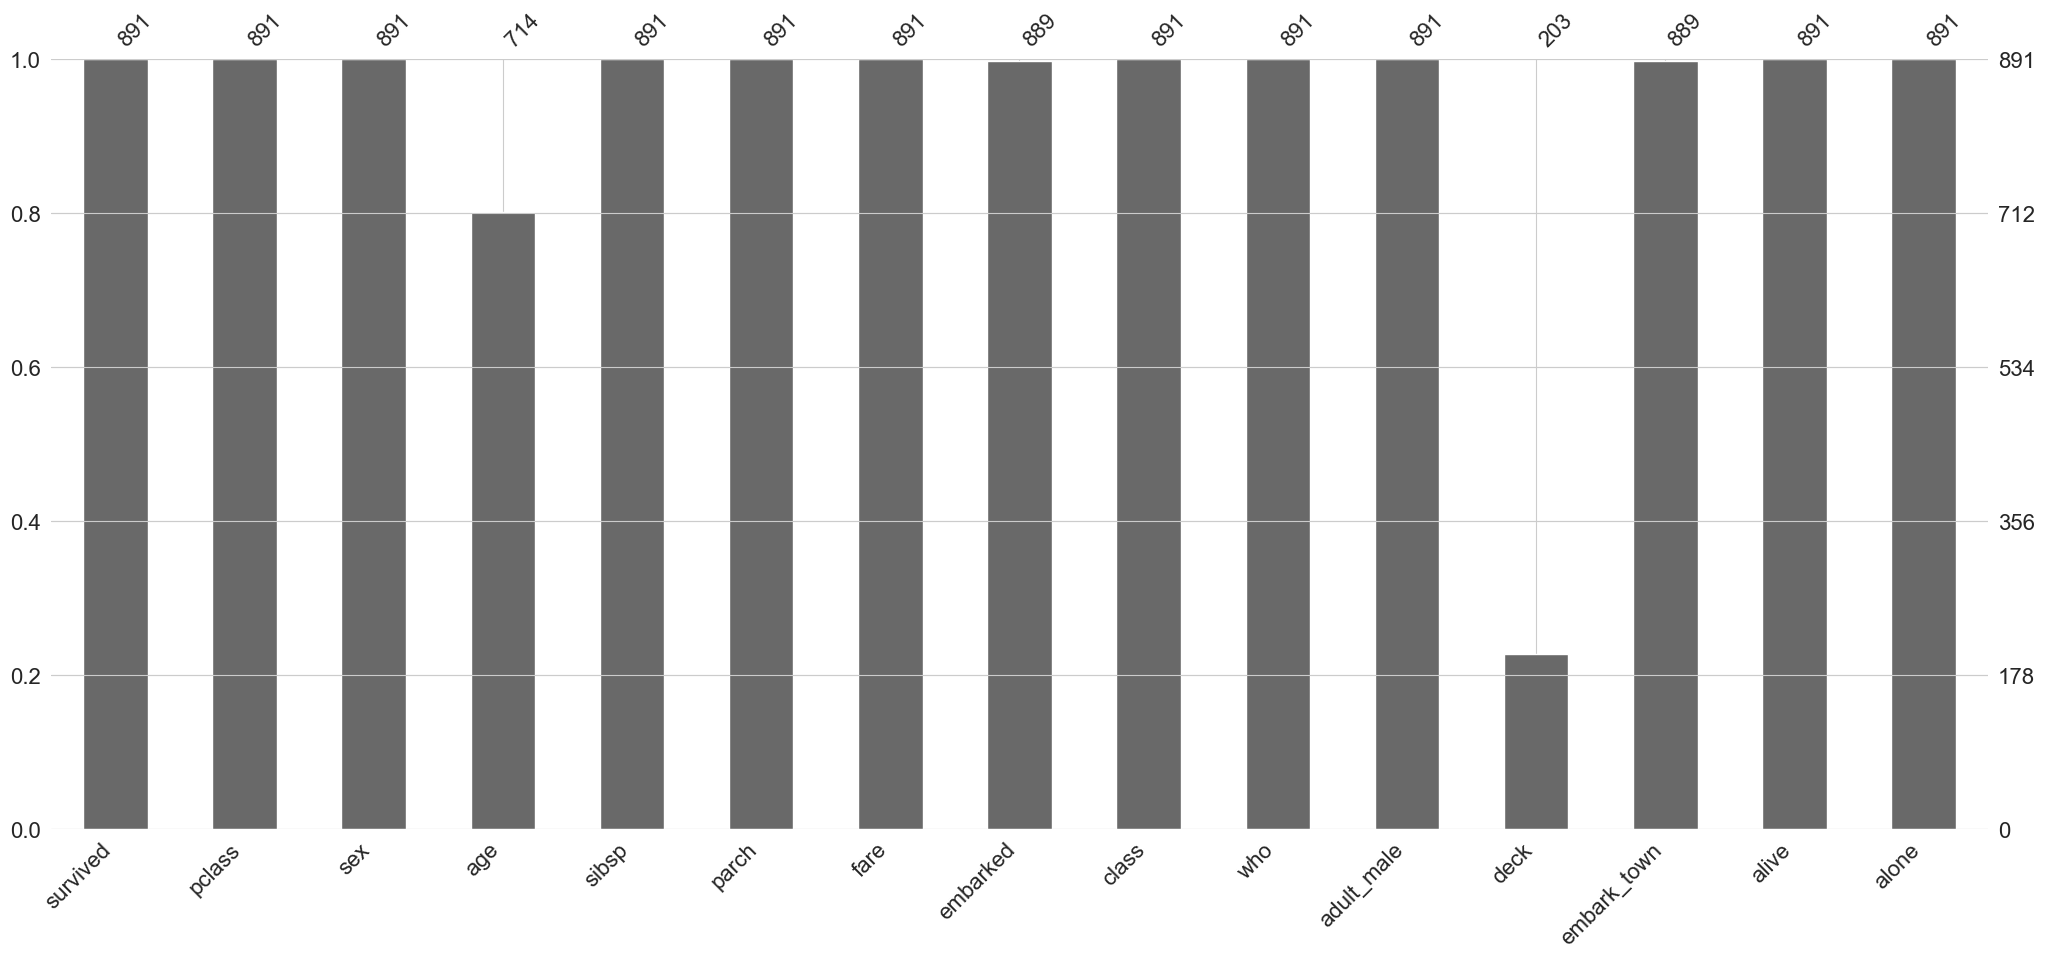

In [16]:
# Gives a bar plot of the missing value

msno.bar(df)

<Axes: >

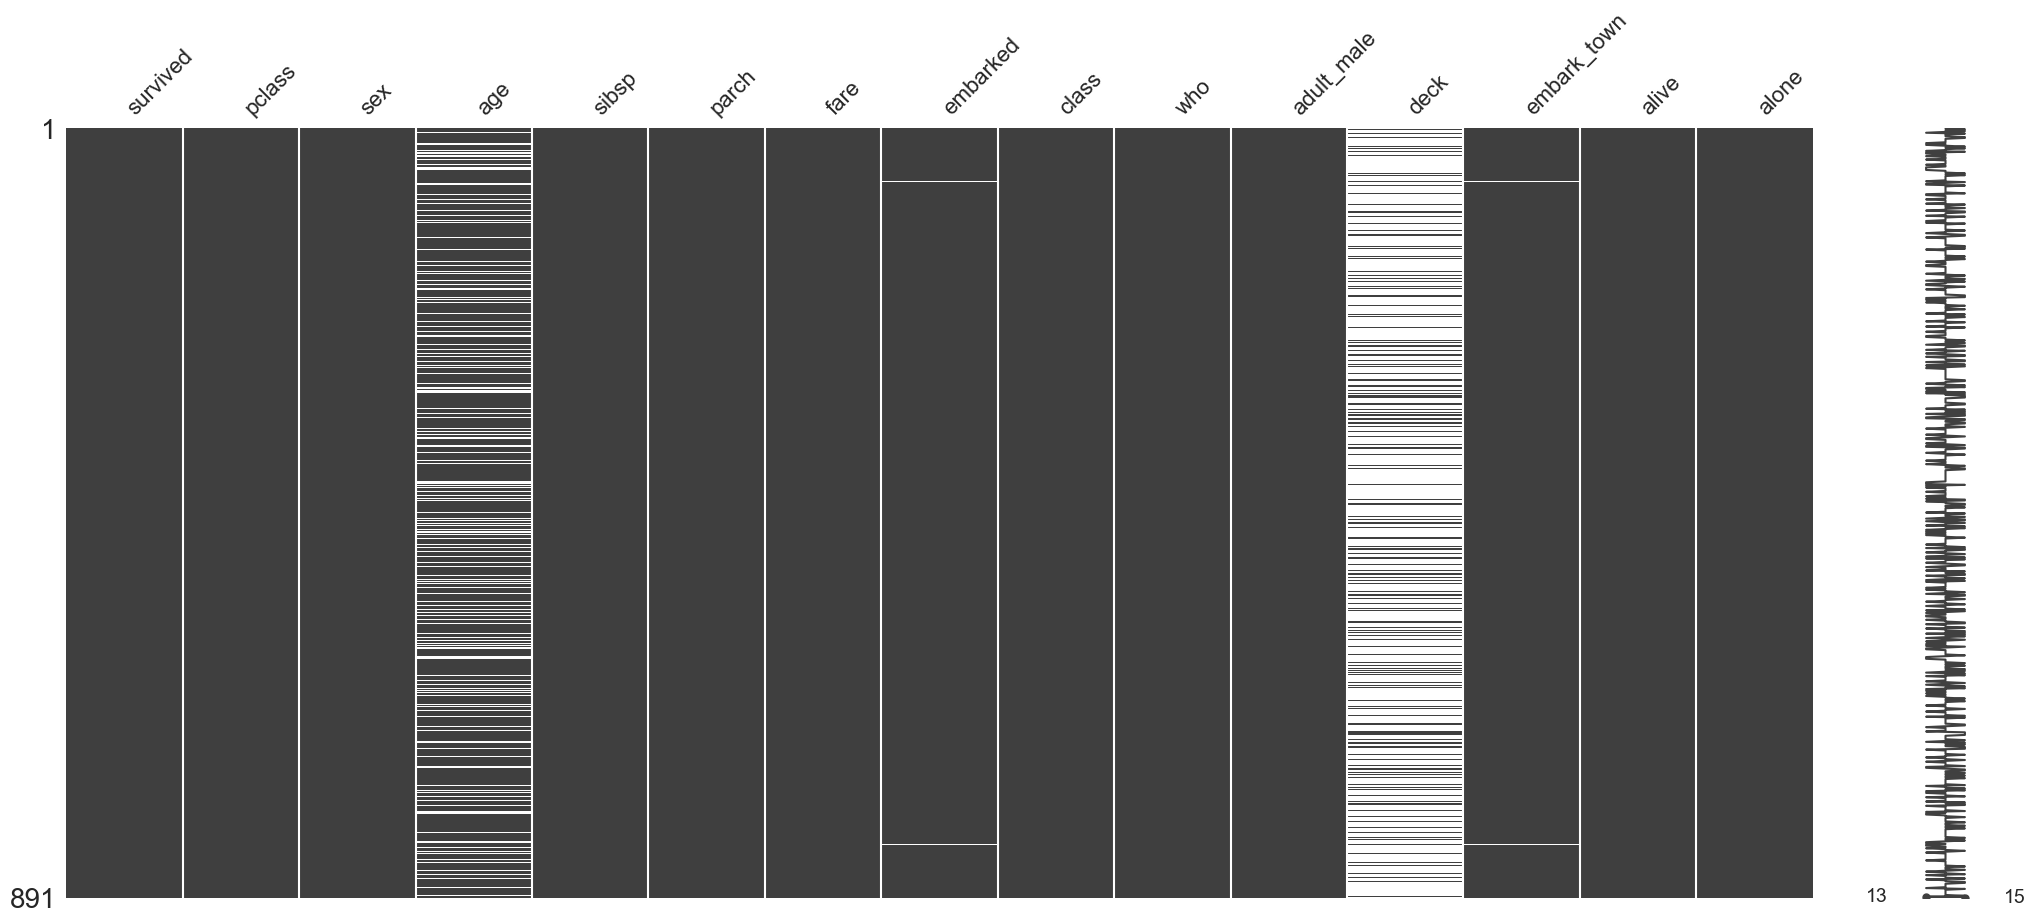

In [17]:
# Gives Positional information of the missing values

msno.matrix(df)

<Axes: >

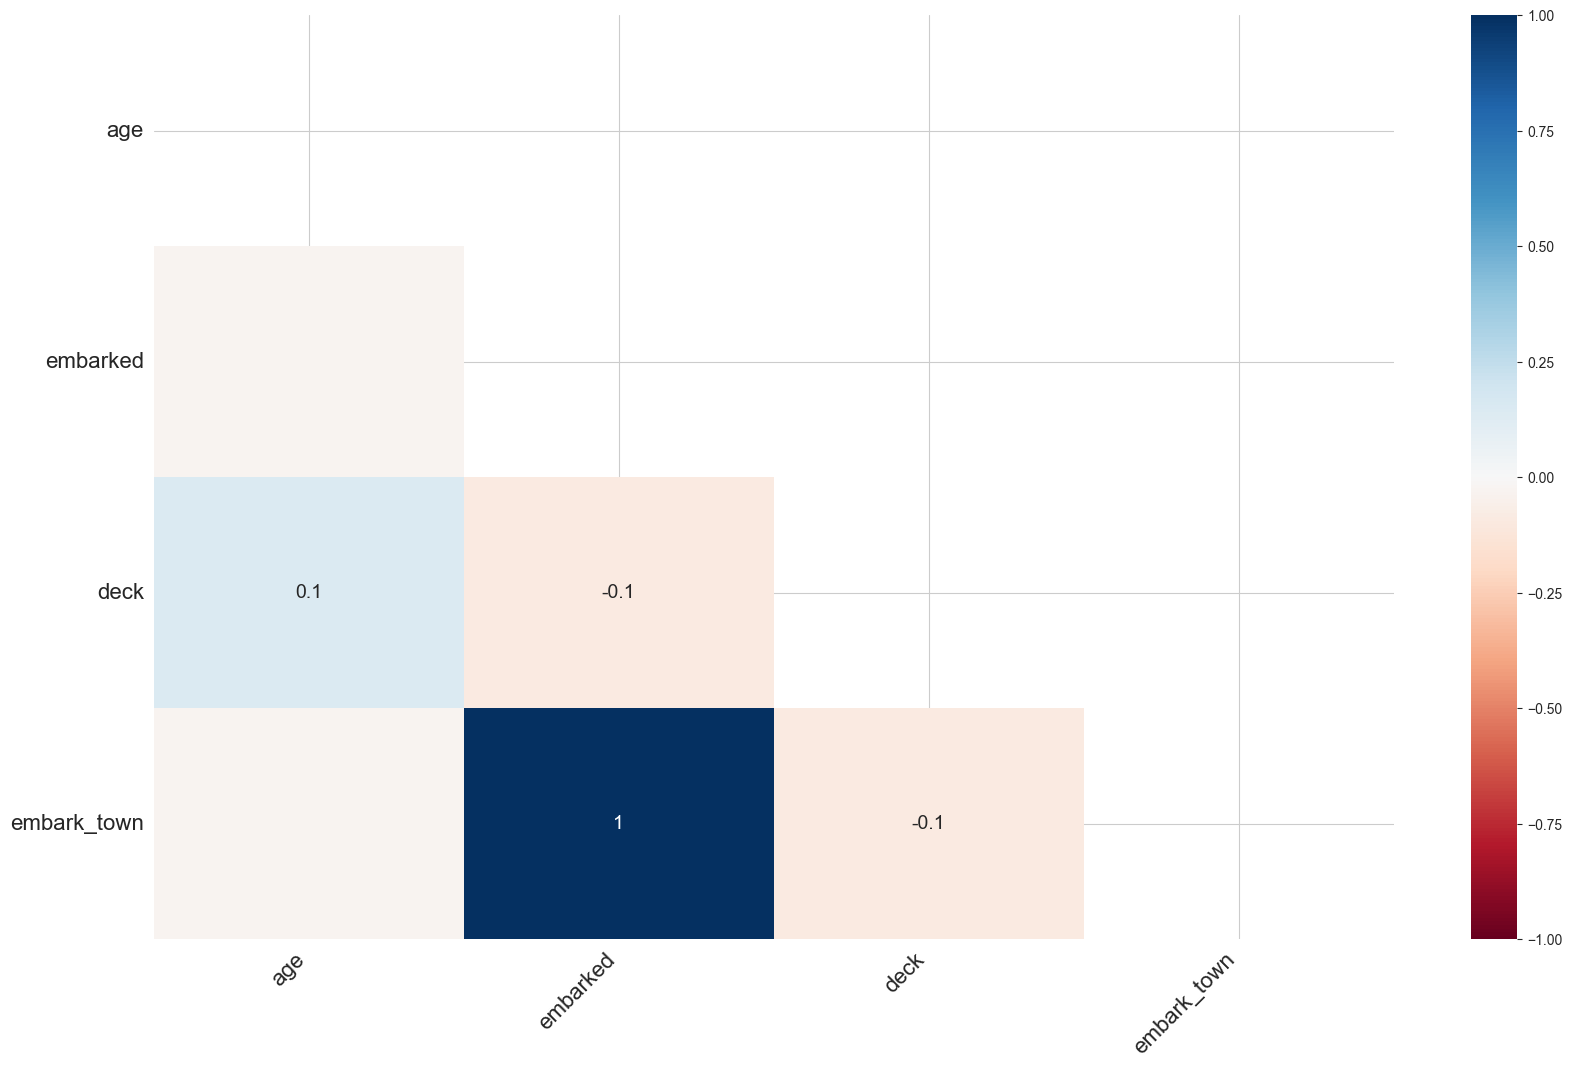

In [18]:
# Gives a heat map how missing values are related

msno.heatmap(df)

<Axes: >

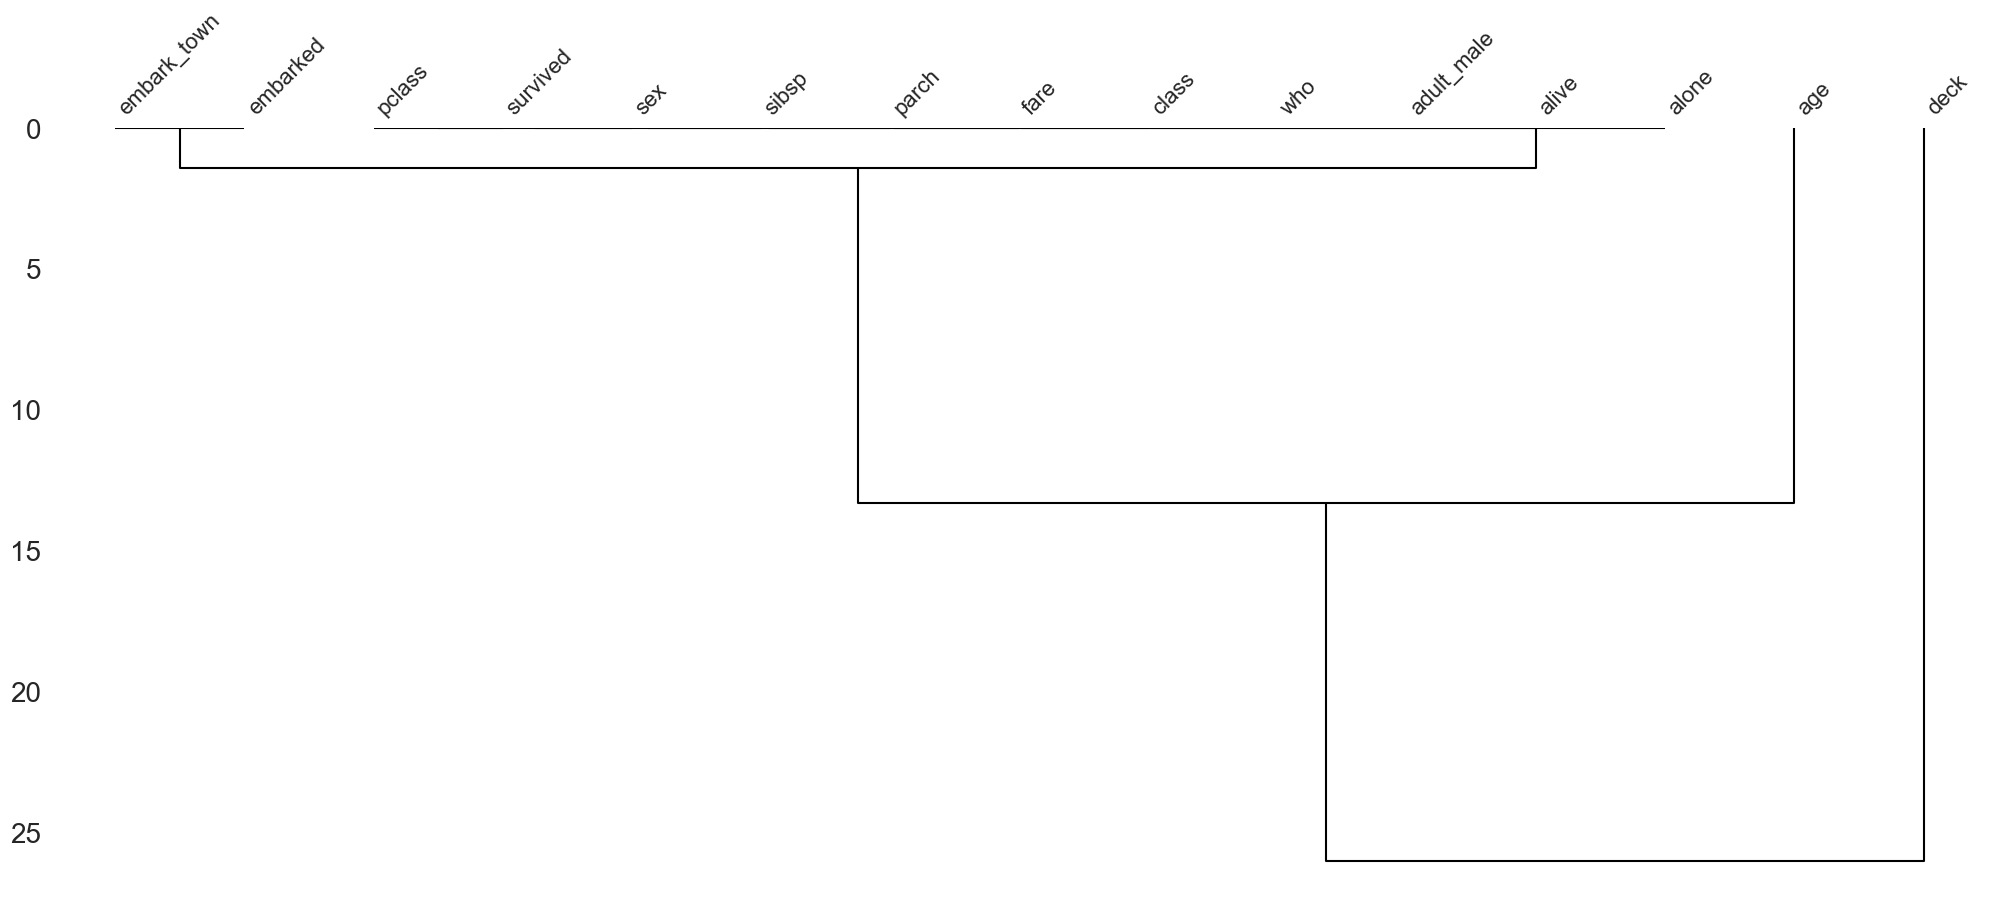

In [20]:
# Gives a Dendogram

msno.dendrogram(df)

In [139]:
# Helper function to draw interplolation graph
def draw_interpolation_graph(x,y, x_orig, y_orig):
    plt.style.use('seaborn-v0_8-notebook')
    plt.figure(figsize=(16, 8), dpi=100)
    
    df_interpolate = pd.DataFrame({
        'method':['linear','quadratic','cubic','polynomial','spline','piecewise_polynomial','krogh','barycentric','pchip','akima','cubicspline','slinear','from_derivatives'],
        'ord':[np.nan,np.nan,np.nan,3,3,3,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],
        'color':['blue','green','red','black','pink','cyan','magenta','orange','brown','yellow','gray','darkgreen','olive'],
        'marker':['o','v','1','2','3','4','s','P','H','+','D','X','*']
    })
    
    # df_interpolate = pd.DataFrame({
    #     'method':['quadratic'],
    #     'ord':[np.nan],
    #     'color':['blue'],
    #     'marker':['o']
    # })
    #display(df_interpolate) 
    
    plt.scatter(x_orig, y_orig, label='original',s=400, alpha=0.5, facecolor='none', color='black')
    plt.scatter(x, y, label='Missing',s=400, alpha=0.5)
    
    for index, row in df_interpolate.iterrows():
        #print(row.method)
        if row.method not in ['polynomial','spline','piecewise_polynomial']:
            plt.plot(x, y.interpolate(method= row.method), color=row.color , marker=row.marker, label=row.method, alpha=0.4)
        else:
            plt.plot(x, y.interpolate(method= row.method, order=int(row.ord)), color=row.color , marker=row.marker, label=row.method, alpha=0.4)
    
    plt.legend(bbox_to_anchor=(1,1))
    
    return plt

In [106]:
# Identifying non-missing values in the 'age' column
non_missing_age = pd.notnull(df['age'])

# Filtering rows where 'age' is not missing
non_missing_age_data = df[non_missing_age]

#display(non_missing_age_data)

# Create a new dataframe with two columns a) age_orig and b) age_predict
dfage = pd.DataFrame({
    'age_orig': non_missing_age_data['age'],
    'age_predict': non_missing_age_data['age']
})

def makenull(dataframe, column, sample_size):
    df1 = dataframe.sample(frac=sample_size)
    for index, row in df1.iterrows():
        dataframe.at[index, column] = np.nan
    
    return dataframe

# update 30% of randomly selected age_predict to NaN
dfage_modified = makenull(dfage, 'age_predict', 0.3)
    
display(dfage_modified)

,age_orig,age_predict
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,NaN
4,35.0,35.0
...,...,...
885,39.0,39.0
886,27.0,27.0
887,19.0,NaN
889,26.0,NaN


C:\Python_Prac\Data_Visualization\.venv\Lib\site-packages\scipy\interpolate\_polyint.py:450: UserWarning: 500 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  P = KroghInterpolator(xi, yi, axis=axis)
C:\Python_Prac\Data_Visualization\.venv\Lib\site-packages\scipy\interpolate\_polyint.py:357: RuntimeWarning: overflow encountered in multiply
  pi = w*pi
C:\Python_Prac\Data_Visualization\.venv\Lib\site-packages\scipy\interpolate\_polyint.py:358: RuntimeWarning: invalid value encountered in add
  p += pi[:,np.newaxis] * self.c[k]
C:\Python_Prac\Data_Visualization\.venv\Lib\site-packages\scipy\interpolate\_polyint.py:358: RuntimeWarning: invalid value encountered in multiply
  p += pi[:,np.newaxis] * self.c[k]


<module 'matplotlib.pyplot' from 'C:\\Python_Prac\\Data_Visualization\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

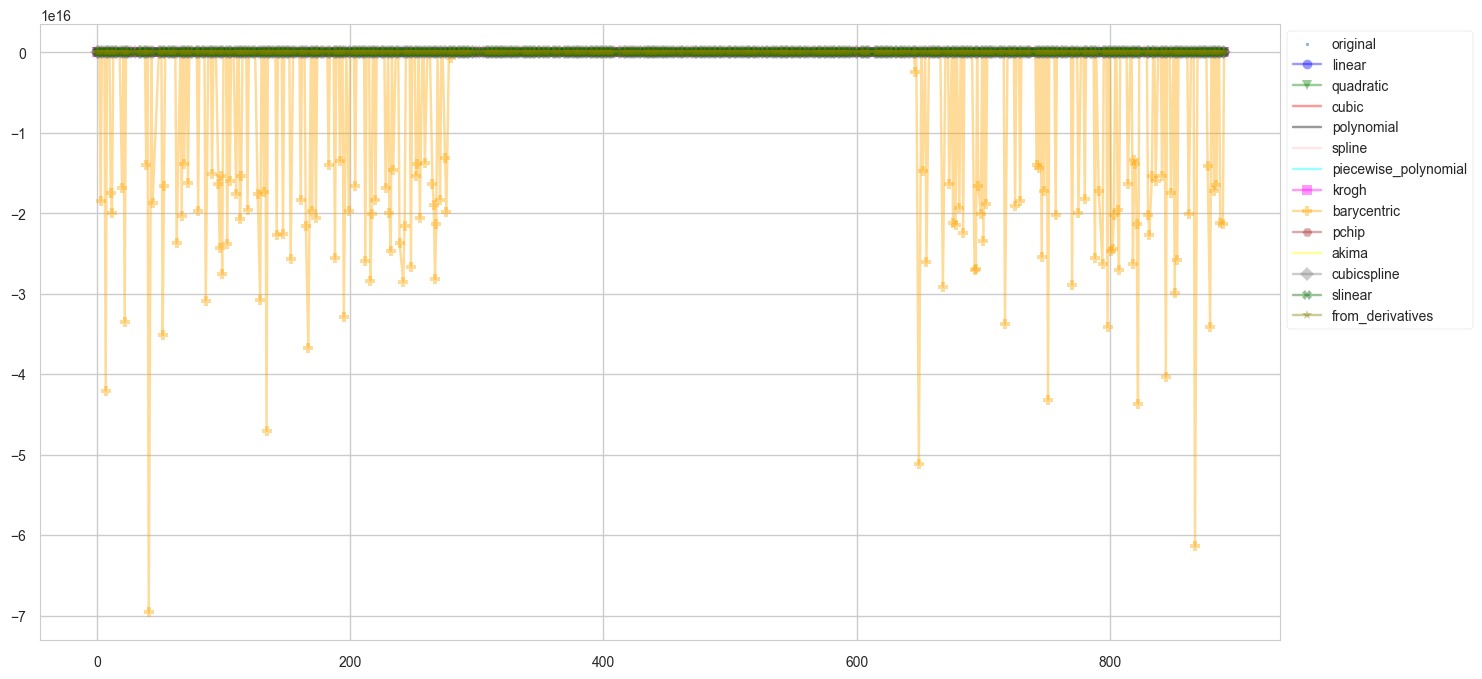

In [111]:
draw_interpolation_graph(dfage_modified.index,dfage_modified.age_predict, dfage_modified.index,dfage_modified.age_orig)

## Experiment with Pandas Fillna menthod

In [43]:
# Prepare experiment data

# Create two Pandas series with NaN

a = pd.Series([np.nan, np.nan, -100, np.nan, np.nan, np.nan, 4,np.nan, 6,np.nan, np.nan, 36, np.nan, np.nan, np.nan, np.nan, 36])
b = pd.Series([0.1,0.2,np.nan, 0.4, np.nan, np.nan, 0.9,1.3,1.4,np.nan,1.8,1.9])

# Create Pandas dataframe with two columns with NaN
m = [0, 1, np.nan, 4, np.nan, np.nan, 6, np.nan, np.nan, 10]
n = [0, 20,  40, np.nan, 43, 45, 46, np.nan, np.nan, 50]
dfmn = pd.DataFrame({
    'm':m,
    'n':n
})

# Create Sin data with NaN
x=np.linspace(0,10,30)
y=np.sin(x)
dfx = pd.DataFrame({
    'x_orig':x,
    'y_orig':y,
    'x':x,
    'y':y,
})
dfx.loc[np.r_[5:8,13:17,20:24,24:28], ['y']] = np.nan
dfx.loc[np.r_[1:4,6:8,20:24, 10:13], ['x']] = np.nan


# Create TimeSeries data with NaN
dt = ['20200101','20200102','20200103','20200104','20200105','20200106','20200107','20200108','20200109',"20200110"]
x_orig = np.random.randn(10)
#x_orig = x_orig.tolist()

dft = pd.DataFrame({
    'dt':dt,
    'x_orig':x_orig.tolist(),
    
})

dft['dt'] = dft.apply(lambda x: pd.Timestamp(x['dt']), axis=1)


# Create NaN's
dft['x']=dft['x_orig']
dft.loc[np.r_[3,4,6:8], 'x'] = np.nan
dft['y_orig'] = np.linspace(1,10,10)**2
dft['y'] = dft['y_orig']
dft.loc[np.r_[3,4,6:8], 'y'] = np.nan

# Set column as index

dft.set_index('dt', inplace=True, drop=True)
dft['interpolate_x'] = dft['x'].interpolate(method='time')
#dft['dt'] = dft['dt'].apply(lambda x: x.strftime('%Y-%m-%d'))
# Drop the index column


dft.reset_index(drop=False, inplace=True)
dft['dt'] = dft['dt'].apply(lambda x: x.strftime('%Y-%m-%d'))
#display(dft)


,dt,x_orig,x,y_orig,y,interpolate_x
0,2020-01-01,-0.869959,-0.869959,1.0,1.0,-0.869959
1,2020-01-02,-0.523117,-0.523117,4.0,4.0,-0.523117
2,2020-01-03,-1.336592,-1.336592,9.0,9.0,-1.336592
3,2020-01-04,-0.756368,NaN,16.0,NaN,-1.337413
4,2020-01-05,-0.235426,NaN,25.0,NaN,-1.338235
5,2020-01-06,-1.339057,-1.339057,36.0,36.0,-1.339057
6,2020-01-07,-0.326566,NaN,49.0,NaN,-1.072078
7,2020-01-08,-1.576303,NaN,64.0,NaN,-0.805099
8,2020-01-09,-0.538120,-0.538120,81.0,81.0,-0.538120
9,2020-01-10,-1.112413,-1.112413,100.0,100.0,-1.112413


### method = 'time'

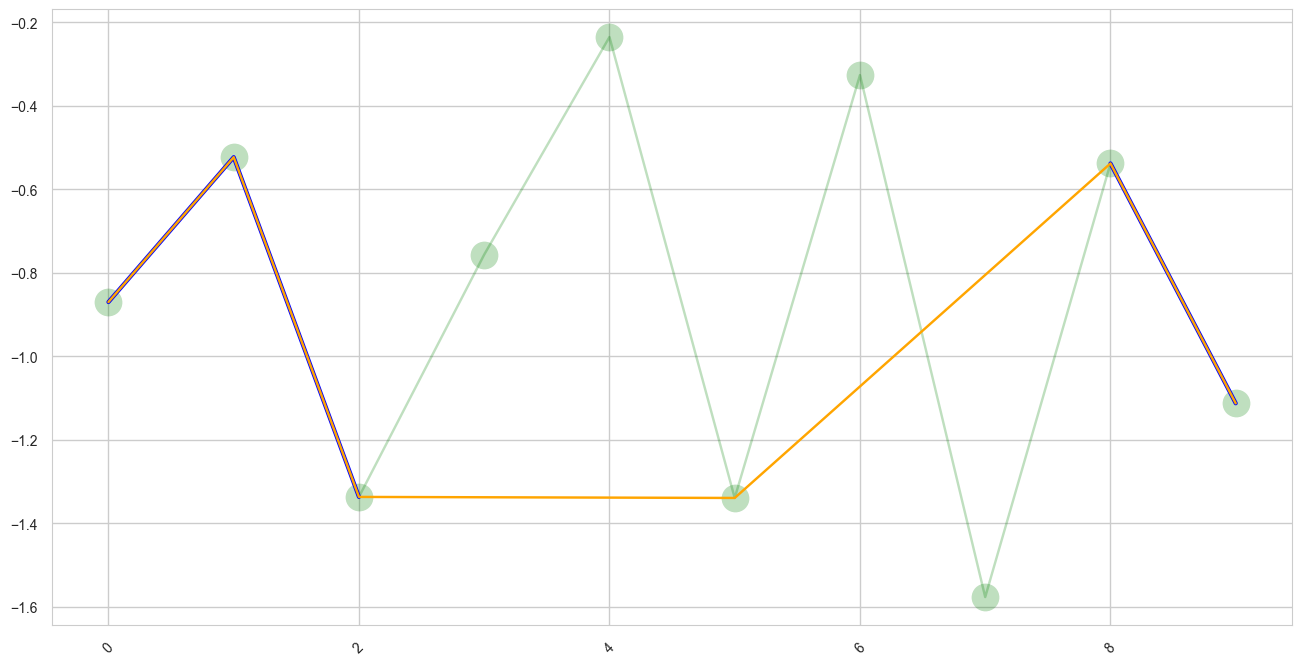

In [46]:
#print(plt.style.available)
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(dft.index,dft['x_orig'] ,marker='o',markersize=20, alpha=0.25, color='green')
plt.plot(dft.index,dft['x'] ,color='blue', lw=3)
plt.plot(dft.index,dft['interpolate_x'] ,color='orange', marker='+', markersize=10)
plt.xticks(rotation=45)
plt.show()

## For Floating data interpolation use method = values

In [47]:
b

0     0.1
1     0.2
2     NaN
3     0.4
4     NaN
5     NaN
6     0.9
7     1.3
8     1.4
9     NaN
10    1.8
11    1.9
dtype: float64

In [48]:
b.interpolate(method='values')

0     0.100000
1     0.200000
2     0.300000
3     0.400000
4     0.566667
5     0.733333
6     0.900000
7     1.300000
8     1.400000
9     1.600000
10    1.800000
11    1.900000
dtype: float64

<module 'matplotlib.pyplot' from 'C:\\Python_Prac\\Data_Visualization\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

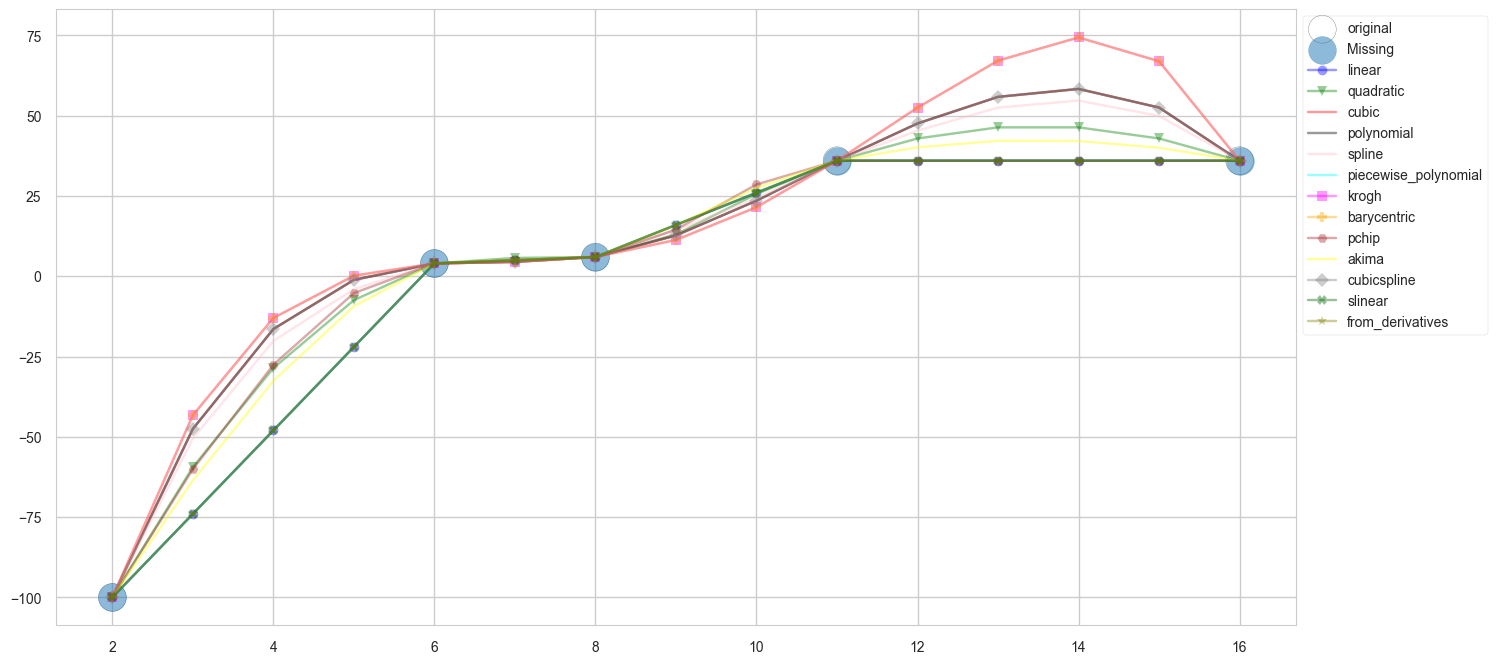

In [132]:
draw_interpolation_graph(a.index,a,a.index,a)

<module 'matplotlib.pyplot' from 'C:\\Python_Prac\\Data_Visualization\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

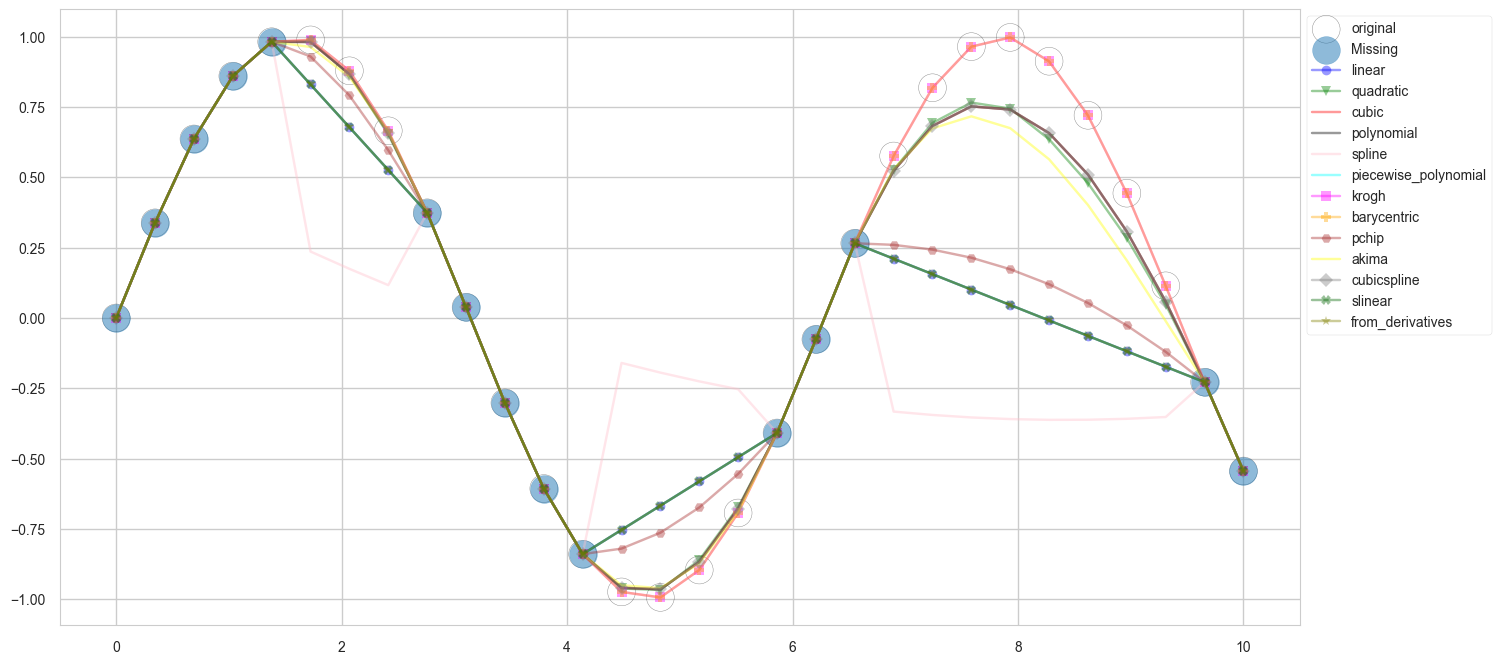

In [140]:
#display(dfx)
draw_interpolation_graph(dfx['x_orig'],dfx['y'],dfx['x_orig'],dfx['y_orig'])